In [1]:
import tensorflow as tf

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
# Save the input and target variables

#print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [5]:
#Normalize data
#Very important step, should always be performed even for image data

#Explain what is the significance of it

#Targets - mean to center data around mean

#Dividing by std deviation to get data in range [-1,1]

targets = (targets - targets.mean(axis = 0)) / targets.std()

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [8]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (train_data.shape[1], )),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [9]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets,
                    epochs=50, validation_split=0.15,
                    batch_size=64
                   )

Epoch 1/50
6/6 [==============================] - 1s 102ms/step - loss: 0.9918 - mae: 0.8559 - val_loss: 0.9735 - val_mae: 0.8305
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9886 - mae: 0.8562 - val_loss: 0.7976 - val_mae: 0.7371
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.7133 - mae: 0.7219 - val_loss: 0.6001 - val_mae: 0.6067
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6303 - mae: 0.6587 - val_loss: 0.5793 - val_mae: 0.5845
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.5122 - mae: 0.5889 - val_loss: 0.5027 - val_mae: 0.6092
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.5169 - mae: 0.5742 - val_loss: 0.6383 - val_mae: 0.6105
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4834 - mae: 0.5475 - val_loss: 0.5095 - val_mae: 0.6052
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 0.4975 - mae: 0.5666 - va

In [11]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

2/2 - 0s - loss: 0.7120 - mae: 0.6167


[0.7120176553726196, 0.6167252659797668]

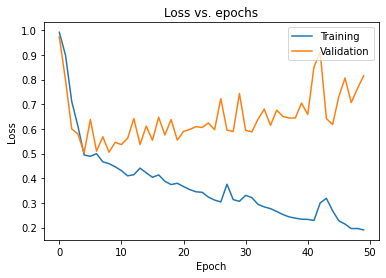

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [15]:
#Let's add regularisation to our model

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [17]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [18]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

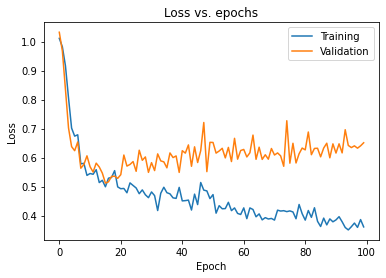

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [21]:
#EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs = 10,
                                       validation_split=0.15, batch_size=64, verbose=False,
                                       callbacks=[EarlyStopping(patience=2)])

In [23]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_hist  = regularised_model.fit(train_data, train_targets, epochs=100,
                                validation_split=0.15, batch_size=64, verbose=False,
                                callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

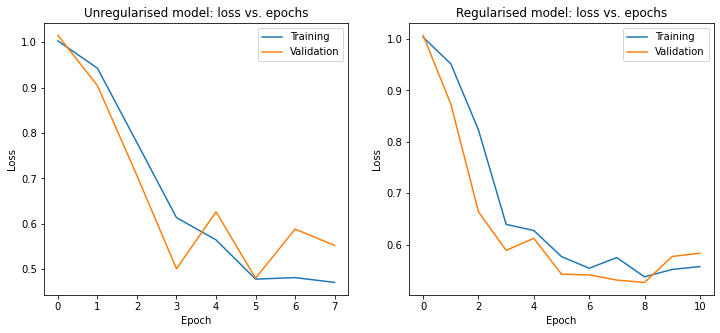

In [24]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_hist.history['loss'])
plt.plot(reg_hist.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()